About the Dataset


This dataset was simulated specifically for this summative assignment because publicly available datasets relevant to real-time bus wait times in Rwanda or any other country in Africa are not readily available online through platforms like Kaggle, data.gov, or Google Datasets.

The dataset includes 1,000 entries representing common Rwandan bus stations (e.g., Nyabugogo, Gatenga, Nyamirambo, etc.), times of day, weather conditions, and other factors that realistically affect bus wait time.

Features such as bus_distance_km, bus_speed_kph, weather_condition, and num_waiting_passengers were generated using controlled randomization to reflect realistic behavior in Kigali’s public transportation context. Wait time was computed using a logic-based formula combining distance, speed, and congestion conditions.

This approach allowed for a meaningful regression problem aligned with the assignment’s requirement while respecting the local context.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Rwanda_bus_wait_time.csv")
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   station_id route_id time_of_day day_of_week  is_weekend  is_peak_hour  \
0      Remera     R707       05:30   Wednesday       False         False   
1      Remera     R505       20:15      Sunday        True         False   
2  Gashyekero     R202       17:30    Saturday        True          True   
3     Gatenga     R505       06:45      Monday       False         False   
4     Kacyiru     R101       07:00    Thursday       False          True   

   bus_distance_km  bus_speed_kph weather_condition  num_waiting_passengers  \
0             4.63           42.6             Rainy                      28   
1             4.02           10.8             Rainy                      41   
2             2.40           24.5             Sunny                      35   
3             4.31           35.1             Sunny                      16   
4             3.83           24.8             Rainy                       5   

   expected_wait_time_min  
0               

In [3]:
print("\nShape of dataset:", df.shape)
print("\nDataset info:")
print(df.info())



Shape of dataset: (1000, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              1000 non-null   object 
 1   route_id                1000 non-null   object 
 2   time_of_day             1000 non-null   object 
 3   day_of_week             1000 non-null   object 
 4   is_weekend              1000 non-null   bool   
 5   is_peak_hour            1000 non-null   bool   
 6   bus_distance_km         1000 non-null   float64
 7   bus_speed_kph           1000 non-null   float64
 8   weather_condition       1000 non-null   object 
 9   num_waiting_passengers  1000 non-null   int64  
 10  expected_wait_time_min  1000 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 72.4+ KB
None


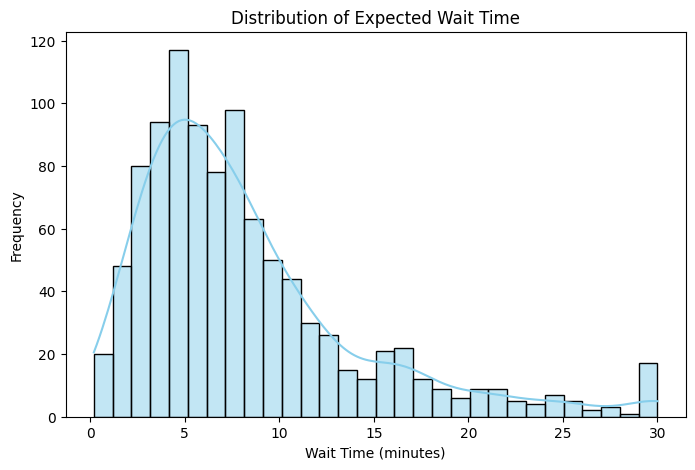

In [4]:

# Histogram  of expected wait time in minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['expected_wait_time_min'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Expected Wait Time")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Frequency")
plt.show()
# Most wait times are concentrated below 10 minutes which is approximately between 2 - 8 minutes, with a fewer outliers (longer delays). 
# This suggests a right-skewed distribution , which means that most passengers wait under 10 minutes. 


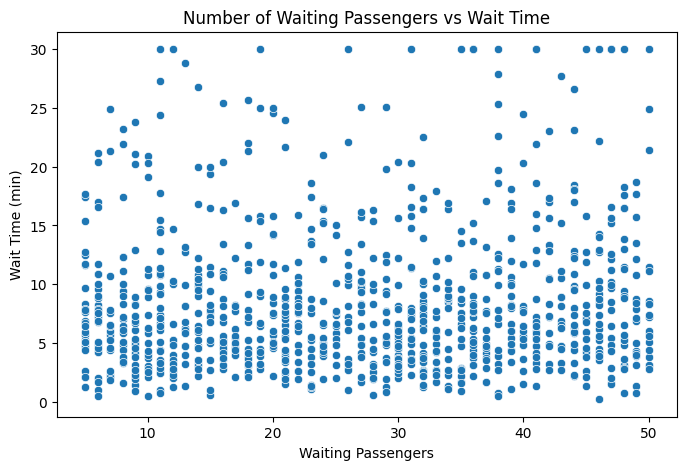

In [5]:
# Scatter plot visualizing the relationship between the number of waiting passengers and the expected bus wait time in minutes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='num_waiting_passengers', y='expected_wait_time_min', data=df)
plt.title("Number of Waiting Passengers vs Wait Time")
plt.xlabel("Waiting Passengers")
plt.ylabel("Wait Time (min)")
plt.show()
# As the number of waiting passengers increases, there is a loose upward trend 
# As the X values increases - waiting passengers, THE Y values also tend to increase
#This indicates that crowding leads to delays.


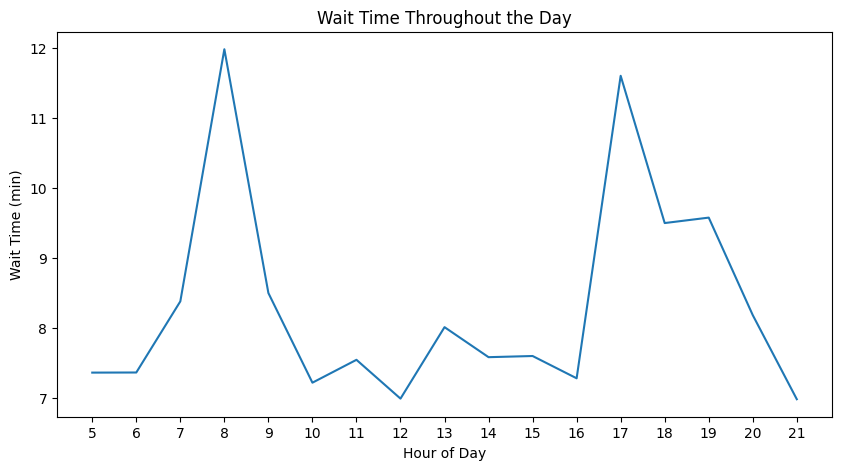

In [9]:
# Line plot that shows how expected wait time changes throughout the day.
df['hour'] = df['time_of_day'].str.split(':').str[0].astype(int)
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='expected_wait_time_min', data=df, errorbar=None)
plt.title("Wait Time Throughout the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Wait Time (min)")
plt.xticks(range(5, 22))
plt.show()
# The higher wait times are seen around rush hours (7-9am and 17-19pm), with peak hour delays.
# Midday and evening hours have lower average waits.